In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
import lazypredict
from lazypredict.Supervised import LazyRegressor
import lightgbm as ltb
import math
from scipy import stats
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

C:\Users\gj979\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
DataSet = pd.read_csv('AChE_Bioactivity_Data_Final.csv')
DataSet

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.60
6942,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.52
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.54
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.19


In [3]:
X = DataSet.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6942,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = DataSet['pIC50']
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
6941   6.60
6942   7.52
6943   4.54
6944   8.19
6945   7.10
Name: pIC50, Length: 6946, dtype: float64

In [5]:
X.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,...,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00,6946.00
mean,1.00,0.99,0.87,0.27,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.02,0.08,0.34,0.44,0.00,0.00,0.00,0.00,0.00,0.02,...,0.00,0.02,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


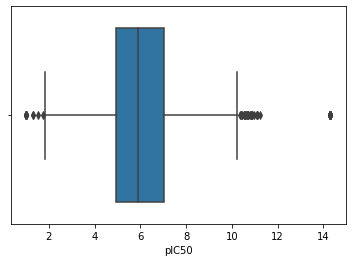

In [6]:
sns.boxplot(Y)
plt.show()

In [7]:
Y.describe()

count   6946.00
mean       5.99
std        1.61
min        1.00
25%        4.92
50%        5.89
75%        7.05
max       14.30
Name: pIC50, dtype: float64

In [8]:
print(f'{X.shape} \n {Y.shape}')

(6946, 881) 
 (6946,)


In [9]:
X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6942,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def remove_low_variance(input_data, threshold):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X.shape

(6946, 211)

In [11]:
p_value = []
col_name = []
names = []
for x in X.columns:
    w = stats.pearsonr(DataSet[x], Y)
    p_value.append(w[1])
    col_name.append(x)
Imp = pd.DataFrame({'Column_name':col_name,
                    'p-value':p_value})
filt = Imp['p-value'] > 0.05
df = Imp[filt]
for i in df['Column_name']:
    names.append(i)
names

['PubchemFP19',
 'PubchemFP20',
 'PubchemFP144',
 'PubchemFP150',
 'PubchemFP184',
 'PubchemFP187',
 'PubchemFP188',
 'PubchemFP286',
 'PubchemFP341',
 'PubchemFP352',
 'PubchemFP365',
 'PubchemFP372',
 'PubchemFP373',
 'PubchemFP381',
 'PubchemFP382',
 'PubchemFP445',
 'PubchemFP452',
 'PubchemFP476',
 'PubchemFP491',
 'PubchemFP498',
 'PubchemFP521',
 'PubchemFP540',
 'PubchemFP541',
 'PubchemFP542',
 'PubchemFP548',
 'PubchemFP565',
 'PubchemFP573',
 'PubchemFP574',
 'PubchemFP589',
 'PubchemFP594',
 'PubchemFP604',
 'PubchemFP606',
 'PubchemFP612',
 'PubchemFP619',
 'PubchemFP620',
 'PubchemFP626',
 'PubchemFP632',
 'PubchemFP636',
 'PubchemFP638',
 'PubchemFP639',
 'PubchemFP641',
 'PubchemFP651',
 'PubchemFP655',
 'PubchemFP666',
 'PubchemFP674',
 'PubchemFP682',
 'PubchemFP689',
 'PubchemFP690',
 'PubchemFP693',
 'PubchemFP698',
 'PubchemFP699',
 'PubchemFP700',
 'PubchemFP701',
 'PubchemFP712',
 'PubchemFP735',
 'PubchemFP776',
 'PubchemFP797',
 'PubchemFP798']

In [12]:
X.drop(names, axis=1, inplace=True)
X.shape

(6946, 153)

In [13]:
X.to_csv('descriptor_list.csv', index=False)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(f"{X_train.shape} \t {Y_train.shape} \n {X_test.shape} \t {Y_test.shape}")

(5556, 153) 	 (5556,) 
 (1390, 153) 	 (1390,)


In [15]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:55<00:00,  2.75s/it]


In [16]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.15,0.24,1.36,0.23
HistGradientBoostingRegressor,0.14,0.24,1.36,5.96
NuSVR,0.13,0.22,1.38,4.22
SVR,0.11,0.21,1.39,5.64
RandomForestRegressor,0.10,0.20,1.40,6.73
GradientBoostingRegressor,0.10,0.20,1.40,2.32
XGBRegressor,0.08,0.18,1.42,0.64
BaggingRegressor,0.07,0.18,1.42,0.85
LassoLarsCV,0.03,0.14,1.45,2.21


[(0.0, 1.0)]

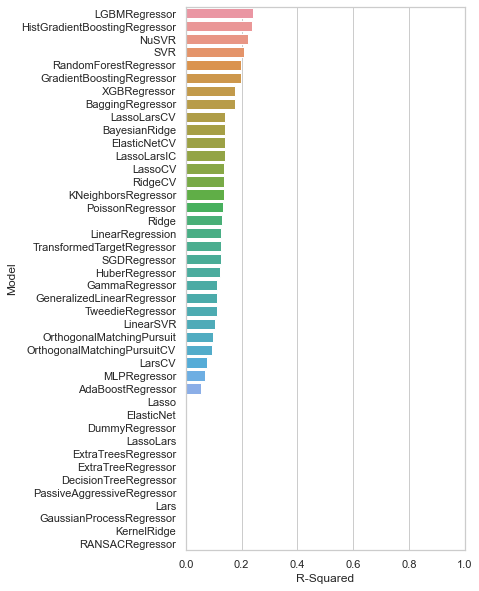

In [17]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

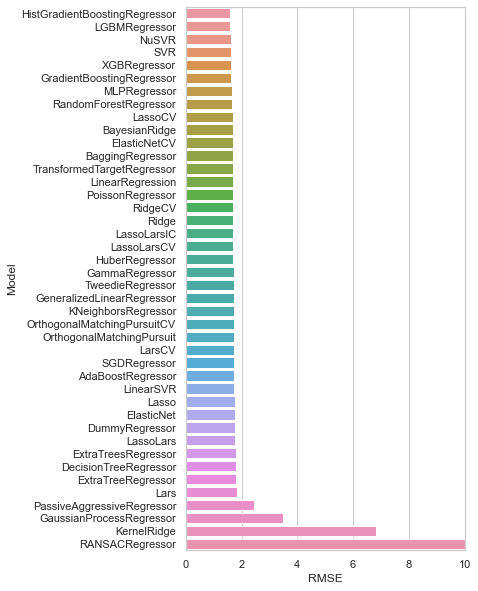

In [14]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

In [18]:
LM = LinearRegression()
LM.fit(X_train, Y_train)
Y_pred = LM.predict(X_test)

In [19]:
mse = mse(Y_test, Y_pred)
mse

2.1278504482074676

In [20]:
r2_score(Y_test, Y_pred)

0.12822270282770065

In [21]:
model = RandomForestRegressor(max_depth=12, min_samples_split=8, n_estimators=250, min_samples_leaf=12)
model.fit(X_train, Y_train)
Y_pred_r = model.predict(X_test)
r2_score(Y_test, Y_pred_r)

0.23624309411801303

In [22]:
Y_pred_r

array([7.29402446, 5.85613401, 5.22041422, ..., 5.41597564, 6.03859551,
       5.97269058])

<function matplotlib.pyplot.show(close=None, block=None)>

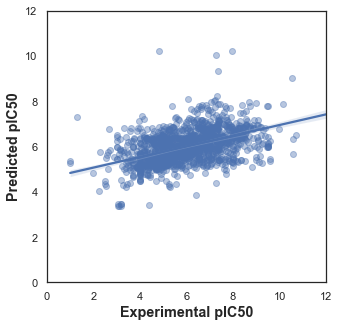

In [23]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred_r, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [24]:
import pickle
pickle.dump(model, open('AChE_model_pubchem.pkl', 'wb'))

#### <font color = 'red'>Takeaways</font> 
##### After Observing the Results from all 5 fingerprints 
- Data is in form of 0s and 1s, so no place for encoding and Feature Scalling
- From the list from Lazy Predict and our random forest model with hyperparameter tuning, we can tell that,
- The range of R square values ranges from 20-28 percent, which is quite low 
- The error / loss / MSE value ranges from 1-2, which is optimal 